In [5]:
import pandas as pd

df= pd.read_csv("../data/raw/dataset.csv")
df.head()


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [7]:
df.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


Le dataset contient 20 000 tickets de support IT multilingues.
Les champs textuels sont majoritairement uniques, ce qui confirme une forte diversité sémantique.
Les colonnes catégorielles montrent un déséquilibre notable, avec une majorité d’incidents techniques de priorité moyenne en anglais.
Les tags sont hiérarchiques mais partiellement renseignés, ce qui nécessite une stratégie de nettoyage et de sélection des niveaux pertinents. // /n 
unique: Nombre de valeurs différentes - top: Valeur la plus fréquente dans la colonne - freq: Nombre d’occurrences de la valeur la plus fréquente

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 2.3 MB


In [10]:
df.isna().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [13]:
df["type"].value_counts(normalize=True)*100

type
Incident    39.890
Request     28.815
Problem     20.920
Change      10.375
Name: proportion, dtype: float64

Avec ce code on va voir la distribution des types de tickets (qulle tickets qui domine,s’il y a un déséquilibre des classes)


<Axes: xlabel='type'>

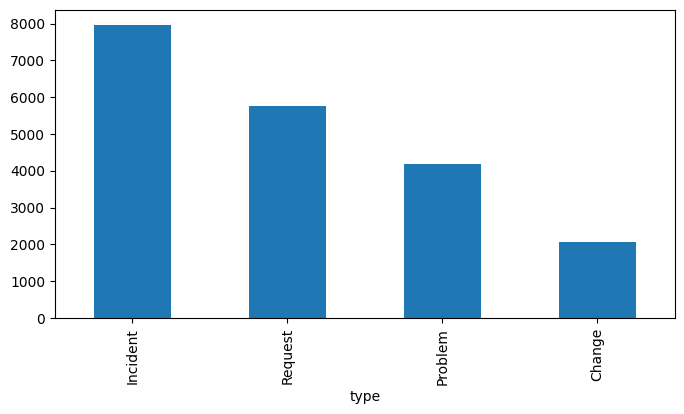

In [14]:
df["type"].value_counts().plot(kind="bar", figsize=(8,4))

La majorité des tickets sont des incidents, ce qui indique un déséquilibre naturel des classes typique des systèmes de support IT

In [20]:
df["email_length"]= df["subject"].str.len()+ df["body"].str.len()
df["email_length"].describe()

count    18537.000000
mean       435.805848
std        252.517220
min         39.000000
25%        238.000000
50%        396.000000
75%        597.000000
max       2283.000000
Name: email_length, dtype: float64

Ces stats décrivent la longueur des emails, ["email_length"] = nombre de mots par email

L’analyse de la longueur des emails a été réalisée afin d’adapter les choix techniques du pipeline NLP, notamment la stratégie de chunking,

<Axes: >

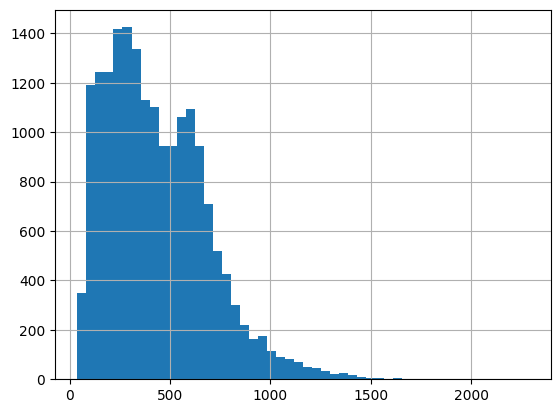

In [21]:
df["email_length"].hist(bins=50)